Make sure you are running this in a virtual environment! Otherwise you may cause problems to your main device. 

Look up how to create a virtual environment if you don't know how. Otherwise you can just run this in google colab. Follow this link to use the colab: https://drive.google.com/drive/folders/1xqYj2SbNwp0Gpms4Qk8-YAlXKtMlvgo7?usp=share_link 

Then in your virtual environment run the following lines:

***

pip install jupyter

pip install ipykernel

python -m ipykernel install --user --name=myenv --display-name "Python (myenv)"

pip install tensorflow

pip install shap

***

The lines will install different packages and libraries that you need for this notebook. I may have forgotten some in which case you can likely just pip install "name of package" in the same format as above.

Also, make sure to download all the files called here and every file in the 'data_files_for_data_construction' folder. Ideally you just download the whole github, but some of the CSV files are rather large.

***

Before we begin we have some standard python libraries to import that we will use throughout this notebook.

In [1]:
import pandas as pd
import time

There was no existing dataset that contained the data needed for this project. Thus first we must generate a synthetic dataset. The dataset will be generated based on a variety of real data, mappings between datasets, and artificially generated lists. 

First we import the Data class which contains all the data needed to generate the synthetic dataset.

Next we import the DataGenerator class for the CPU. Note that a version does exist that runs on the GPU.

In [2]:
from datafiles_for_data_construction.data import Data
from data_generation.data_generation_CPU import DataGenerator

Next, we instantiate the Data and DataGenerator classes. The Data class allows us to access all the data needed to generate the synthetic dataset and the DataGenerator class allows us to use the functions needed to generate the synthetic dataset.

In [3]:
data = Data()
data_generator = DataGenerator(data)

What does the data look like? Some of the data is a list of values. Some lists were generated synthetically, others were pulled from various sources. More information can be found in the README file. Here is a list of learning styles:

In [4]:
data.learning_style()["learning_style_list"]

['Visual', 'Auditory', 'Read/Write', 'Kinesthetic']

Some of the data is a dictionary. Some dictionaries map different lists together while others map lists to demographic statistics on how common each item is. This dictionary maps the learning styles to the percentage of people that have said style.

In [5]:
data.learning_style()["learning_style"]

{'Visual': 27.27, 'Auditory': 23.56, 'Read/Write': 21.16, 'Kinesthetic': 28.01}

Now we use the generate_synthetic_dataset function to create a dataset from all the data. This function has two inputs:
- number of samples (an integer) which tell the function how many 'students' we want in our dataset
- batch size (an integer) which tells the function how to split up the work to prevent overloading the computer.
You can change the values if you want to generate more or less data. Be careful as higher values for number of samples will lead to a longer runtime.

In [6]:
num_samples = 100 # You can change these values if you want
batch_size = 10 # Batch size should be about 1/10 of the number of samples

Now we call the function. Use the time library to see how long the generator takes.

In [7]:
start_time = time.time()
synthetic_data = data_generator.generate_synthetic_dataset(num_samples, batch_size)
end_time = time.time()
runtime = end_time - start_time
print(runtime)

16.318107843399048


'generate_synthetic_dataset' outputs a pandas dataframe. Lets look at the top 5 elements of the dataframe. You can look back at the README file to get a better sense of what each column contains and how it was generated.

In [8]:
synthetic_data.head(n=5) # Change n to larger numbers to see more rows of the dataframe

,first name,last name,ethnoracial group,gender,international status,socioeconomic status,learning style,gpa,student semester,major,previous courses,course types,course subjects,subjects of interest,extracurricular activities,career aspirations,future topics
0,Sylus,Harkey,European American or white,Male,Domestic,Lower-middle income,[Visual],3.50,3,[],"[Undergraduate Open Seminar, First Year Bosnia...","[[Independent Study], [Lecture, Practice], [Le...","[BCS, HDFS, HORT, MUSC, CS, ENG, ECON, MUS, CM...","[Art, Music]","[Multicultural Student Association, Fashion De...","[Photographer, Designer, Artist and Related Wo...","[Graphic Design, Dance, Film and Media Studies..."
1,Jvon,Cronier,European American or white,Female,Domestic,Lower-middle income,[Kinesthetic],2.74,7,[Operations Logistics And E-Commerce],"[Undergraduate Open Seminar, Engineering Graph...","[[Online], [Laboratory, Lecture-Discussion], [...","[AFST, HDFS, CS, ARCH, CEE, MUS, RHET, PS, ECO...","[Biology, Psychology, Comparative World Litera...","[Supply Chain Management Club, Marketing Assoc...","[Production, Planning, and Expediting Clerk, P...","[Economics, Business, Logistics, Marketing, Bu..."
2,Devine,Tylenda,European American or white,Female,Domestic,Middle income,"[Visual, Auditory]",2.04,12,"[Environmental Science, Nutrition Sciences]","[Public Speaking, Writing and Research, Genera...","[[Discussion/Recitation, Online Lecture Discus...","[AFST, THEA, ESL, CS, ARCH, CLE, MUS, ECE, WLO...","[Literature, Comparative World Literature, Eng...","[Journalism Club, Business Club, Finance Club,...","[Manager, Dietician and Nutritionist, First-Li...","[Environmental Science, Geology, Natural Resou..."
3,Jelani,Minko,Latino/a/x American,Male,International,Near poverty,[Kinesthetic],NaN,0,[],[],[],[],[],[],[],"[Public Health, Family Studies, Environmental ..."
4,Arista,Petriccione,European American or white,Female,Domestic,Middle income,[Read/Write],3.51,10,"[Philosophy And Religious Studies, Human Servi...","[General Chemistry II, Intro to Academic Writi...","[[Study Abroad], [Online], [Studio], [Laborato...","[CS, ESL, ACCY, IB, SWAH, MUS, ECE, LA, MSE, H...","[History, Philosophy, Classical Civilizations,...","[Sorority Council, Social Work Club, Education...","[First-Line Supervisor of Sale Worker, Element...","[Educational Psychology, Philosophy, Family St..."


Notice that we have columns that are lists and columns that are strings. Machine learning models need the input data to be numerical. Thus some data preprocessing is required.

We import the Preprocessing class to do the preprocessing work.

In [9]:
from data_preprocessing.preprocessing import PreProcessing

Inside the Preprocessing class there are two functions that do the main preprocessing work:
- 'stringlist_to_binarylist': converts lists of strings into a binary list
- 'string_list_to_numberedlist': converts lits of strings into a numbered list.

Imagine the full options available are ['alice', 'bob', 'charlie']
Thus for the entry ['alice', 'charlie'] we get:
[1,0,1] for 'stringlist_to_binarylist'
[0,2] for 'string_list_to_numberedlist'

When we instantiate the class and call the 'preprocess_dataset' function both of the above functions will be called on certain columns. 'stringlist_to_binarylist' is called on 'learning styles' and 'string_list_to_numberedlist' is called on all the other lists.

In [10]:
preprocessor = PreProcessing(data)
start_time = time.time()
preprocessed_data = preprocessor.preprocess_dataset(synthetic_data)
end_time = time.time()
runtime = end_time - start_time
print(runtime)

0.12319183349609375


'preprocess_dataset' outputs a pandas dataframe. Lets look at the top 5 elements of the dataframe.

In [11]:
preprocessed_data.head(n=5) # Change n to larger numbers to see more rows of the dataframe

,learning style,gpa,student semester,major,previous courses,course types,course subjects,subjects of interest,extracurricular activities,career aspirations,future topics
0,"[1, 0, 0, 0]",3.50,3,[],"[3338, 1230, 2277, 3339, 2615, 1811, 2122, 197...","[0, 4, 5, 1, 2, 3, 20, 14]","[33, 98, 102, 138, 56, 70, 65, 137, 54, 5, 46,...","[7, 8]","[34, 179, 175, 174, 169, 173]","[107, 43, 10]","[78, 39, 66, 14, 157]"
1,"[0, 0, 0, 1]",2.74,7,[138],"[3338, 1067, 2220, 1075, 1312, 2527, 1774, 151...","[9, 0, 4, 5, 10, 1, 2, 3, 11, 6, 20]","[9, 98, 56, 18, 44, 137, 206, 228, 65, 78, 147...","[2, 10, 55, 50, 12, 21, 91]","[117, 67, 221, 60, 96]","[115, 117, 62, 48, 80, 82, 56, 129, 125, 16, 2...","[47, 26, 206, 107, 27]"
2,"[1, 1, 0, 0]",2.04,12,"[61, 136]","[2615, 3461, 1312, 3411, 2517, 1742, 1346, 817...","[9, 0, 4, 13, 5, 10, 1, 2, 3, 8, 20, 16, 14, 1...","[9, 162, 79, 56, 18, 53, 137, 64, 230, 116, 20...","[5, 55, 60, 114, 18, 15, 29, 8]","[69, 60, 96, 90, 62, 212, 67, 217, 168]","[82, 45, 62, 64, 56, 55, 52, 125, 122, 20, 140...","[59, 75, 120, 46, 6]"
3,"[0, 0, 0, 1]",NaN,0,[],[],[],[],[],[],[],"[134, 65, 60, 77, 145]"
4,"[0, 0, 1, 0]",3.51,10,"[143, 85]","[1311, 1753, 3401, 991, 1311, 3187, 3386, 3352...","[9, 0, 4, 13, 5, 10, 1, 2, 3, 11, 6, 18, 20, 1...","[56, 79, 2, 105, 217, 137, 64, 116, 136, 102, ...","[4, 14, 56, 92, 22, 67, 15, 77, 8, 72, 3]","[9, 120, 71, 212, 113, 87, 90, 62, 23, 84, 260]","[62, 50, 112, 136, 26, 45, 53, 22, 40, 125, 11...","[49, 129, 65, 48, 180]"


Now that the data has been preprocessed we must privatize the data to keep it safe.

We import the Privatizer class to do this.

In [12]:
from data_privatization.privatization import Privatizer

There are a variety of privatization methods you can try:
- Basic Differential Privacy (laplace noise addition)
- Uniform Noise Differential Privacy (uniform noise addition)
- Shuffling
Both Differential Privacy types can be done with or without list lengthening. This means the list columns like 'previous courses' could be lengthened according to the noise addition function. More details can be found in the README file. Let's try basic differential privacy with list lengthening.

In [13]:
privatization_type = 'basic differential privacy'
# Other 'privatization_type' options: 'uniform', 'shuffle', 'full shuffle' (full shuffle shuffles all of the rows)
privatizer = Privatizer(data, style=privatization_type, list_length=True)
# Can set 'list_length' to false if you don't want to allow the list sizes to change

Now we call 'privatize_dataset'. Use the time library to see how long the privatizer takes.

In [14]:
start_time = time.time()
privatized_data = privatizer.privatize_dataset(preprocessed_data)
end_time = time.time()
runtime = end_time - start_time
print(runtime)

0.012232303619384766


'preprocess_dataset' outputs a pandas dataframe. Lets look at the top 5 elements of the dataframe.

In [15]:
privatized_data.head(n=5) # Change n to larger numbers to see more rows of the dataframe

,learning style,gpa,student semester,major,previous courses,course types,course subjects,subjects of interest,extracurricular activities
0,"[1, 1, 1, 0]",2.65,12,"[156, 73]","[357, 2641, 2696, 2584, 2856, 924, 1338, 1997,...","[14, 18, 0, 3, 3, 14, 1, 20, 9, 5]","[98, 178, 98, 144, 106, 148, 127, 18, 194, 31,...","[134, 89, 123, 44, 23, 106, 135, 77, 38, 114, ...","[98, 289, 82, 155, 254, 41, 144, 296, 61, 231,..."
1,"[0, 1, 1, 1]",3.66,12,[157],"[2208, 1840, 985, 2462, 3388, 1069, 3096, 791,...","[18, 9, 20, 18, 2, 11, 2, 17, 17, 17, 18, 16, ...","[95, 83]","[114, 66, 111, 71, 113, 117, 100, 45, 63, 34, 6]","[172, 237, 142]"
2,"[1, 1, 1, 1]",2.11,7,"[19, 75]",[],"[20, 1, 15, 3, 6, 5, 0, 1, 18, 11, 2, 15, 10, ...",[198],"[93, 77, 45, 66, 38, 72, 101, 4, 69, 86, 64, 4...","[67, 95, 224, 209, 102, 151, 254, 165, 104, 20..."
3,"[1, 1, 1, 0]",NaN,13,[],"[2520, 2323, 2381, 3411, 3120, 1940, 2384, 125...","[11, 7, 9, 13, 18, 15, 15, 15, 2, 20]","[79, 199, 119, 9, 68, 218, 106, 163, 236, 17, ...","[60, 16, 80, 115, 66, 110, 15, 112, 136, 46, 7...","[36, 5, 202, 66, 105, 23, 152, 259, 74, 141, 1..."
4,"[0, 0, 1, 1]",2.85,5,"[118, 151]","[1211, 1936, 1057, 1247, 2051, 3459, 2172, 298...","[2, 5, 8, 4, 7]","[189, 19, 94, 131, 223, 68, 70, 27, 123, 161, ...","[11, 27, 39, 46, 119, 10, 40, 135, 2, 67, 65, ...","[109, 104, 195, 112, 211, 89, 89, 30, 34, 56, ..."


We still have the problem of long lists. The 'previous courses list' can be over 30 elements long! Thus we call a new function from the Preprocessor class, 'create_RNN_models'. Three different recurrent neural network models are used to reduce the dimension of each list to 1 element. The three networks are: Simple, GRU (Gated Recurrent Units), and LSTM (Long Term Short Memory).

Since 'create_RNN_models' takes in a dataframe, there is no need to create a new instance of the Preprocessor class. Thus we should call:
- 'privatized_data': reduce dimensionality
- 'preprocessed_data': give a null for comparison at the end
- 'preprocessed_data' with 'utility=True': reduce dimensionality of the utility columns

Let's also calculate and compare the runtimes.

Let us just use the simple RNN dimensionality reduction. Though this can be switch by changing 'simple' to False and a different method to True.

In [16]:
# Only let one of simple, LSTM, and GRU be equal to true.

start_time = time.time()
privatized_data_reduced = preprocessor.create_RNN_models(privatized_data, simple=True, LSTM=False, GRU=False)
end_time = time.time()
runtime_pd = end_time - start_time

start_time = time.time()
nonprivatized_data_reduced = preprocessor.create_RNN_models(preprocessed_data, simple=True, LSTM=False, GRU=False)
end_time = time.time()
runtime_npd = end_time - start_time

start_time = time.time()
utility_cols_reduced = preprocessor.create_RNN_models(preprocessed_data, utility=True, simple=True, LSTM=False, GRU=False)
end_time = time.time()
runtime_uc = end_time - start_time

print(f'Privatized data runtime: {runtime_pd}')
print(f'Nonprivatized data runtime: {runtime_npd}')
print(f'Utility columns runtime: {runtime_uc}')

Epoch 1/10


2024-07-13 16:31:48.471008: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-07-13 16:31:48.471037: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-07-13 16:31:48.471048: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-07-13 16:31:48.471367: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-13 16:31:48.471386: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-07-13 16:31:49.214105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.2290
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0884
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0981
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0781
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0881
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0819
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0709
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0776
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0842
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0848
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.2303
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1297
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1086
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1074
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0775
Epoch 6/10
4

2024-07-13 16:33:17,579 - tensorflow - WARNING - 5 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x319daa3e0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step

2024-07-13 16:33:18,072 - tensorflow - WARNING - 6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x319daa3e0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 289ms/step - loss: 0.1966
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step - loss: 0.1133
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 300ms/step - loss: 0.0723
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step - loss: 0.0805
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 264ms/step - loss: 0.0615
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step - loss: 0.0444
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step - loss: 0.0452
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 297ms/step - loss: 0.0335
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 264ms/step - loss: 0.0300
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step - loss: 0.0309
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.2487
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 0.0770
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 0.0561
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 0.0530
Epoch 5/10
4/4 ━━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 0.0680
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 930ms/step - loss: 0.0697
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 0.0425
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 0.0354   
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 0.0247
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 0.0206 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - loss: 0.0194
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 960ms/step - loss: 0.0136
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 985ms/step - loss: 0.0094
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 539ms/step - loss: 0.1243
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 495ms/step - loss: 0.0893
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 493ms/step - loss: 0.0789
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 497ms/step - loss: 0.0628
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 517ms/step - loss: 0.0583
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 557ms/step - loss: 0.0497
Epoch 7/10

Since this code can be run to produce many dataframes the output is a list. We only made one dataframe so let's just take the first element from the list.

In [17]:
privatized_data_reduced = privatized_data_reduced[0]

nonprivatized_data_reduced = nonprivatized_data_reduced[0]

utility_cols_reduced = utility_cols_reduced[0]

'create_RNN_models' outputs a pandas dataframe. Lets look at the top 5 elements for each of the dataframes

In [18]:
print(privatized_data_reduced.head(n=5))
print(nonprivatized_data_reduced.head(n=5))
print(utility_cols_reduced.head(n=5))
# Change n to larger numbers to see more rows of the dataframe

  learning style   gpa  student semester         major previous courses  \
0   [0.31668237]  2.65                12  [0.41257358]     [0.75822955]   
1   [0.32964167]  3.66                12  [0.09832996]     [0.37364194]   
2   [0.35613245]  2.11                 7  [0.19619362]      [0.5005759]   
3   [0.31668237]   NaN                13  [0.33596936]     [0.20239292]   
4    [0.4208539]  2.85                 5  [0.11060862]      [0.6589454]   

   course types course subjects subjects of interest  \
0  [0.30064917]    [0.71762806]           [1.030142]   
1  [0.91137254]    [0.53308123]         [0.66828936]   
2  [0.59589547]    [0.47996578]         [0.68414146]   
3  [0.18267526]     [1.0309092]          [0.6718631]   
4  [0.65713614]    [0.11640821]         [0.66446203]   

  extracurricular activities  
0             [-0.023807649]  
1               [0.89253306]  
2                [0.6744121]  
3              [0.094070084]  
4                [0.6178255]  
  learning style   gpa  st

Now we have to preprocess the private columns so that machine learning models can train on them. To do this we import the PrivateColumns from the 'preprocessing_private_columns' file.

In [19]:
from data_preprocessing.processing_private_columns import PrivateColumns

Now we can instantiate the class.

In [20]:
private_columns_data = PrivateColumns(data)

Get the privacy columns from the nonprivatized dataset as we only need them once.

In [21]:
privacy_columns = private_columns_data.get_private_cols(synthetic_data)

Now we use pandas to combine back together the feature columns, the private columns, and the utility columns. We do this for both the privatized and nonprivatized dataset

In [22]:
privatized_combined = pd.concat([privatized_data_reduced, utility_cols_reduced, privacy_columns])
nonprivatized_combined = pd.concat([nonprivatized_data_reduced, utility_cols_reduced, privacy_columns])

Let's look at the top five elements of both the combined dataframes.

In [23]:
print(privatized_combined.head(n=5))
print(nonprivatized_combined.head(n=5))
# Change n to larger numbers to see more rows of the dataframe

  learning style   gpa  student semester         major previous courses  \
0   [0.31668237]  2.65              12.0  [0.41257358]     [0.75822955]   
1   [0.32964167]  3.66              12.0  [0.09832996]     [0.37364194]   
2   [0.35613245]  2.11               7.0  [0.19619362]      [0.5005759]   
3   [0.31668237]   NaN              13.0  [0.33596936]     [0.20239292]   
4    [0.4208539]  2.85               5.0  [0.11060862]      [0.6589454]   

   course types course subjects subjects of interest  \
0  [0.30064917]    [0.71762806]           [1.030142]   
1  [0.91137254]    [0.53308123]         [0.66828936]   
2  [0.59589547]    [0.47996578]         [0.68414146]   
3  [0.18267526]     [1.0309092]          [0.6718631]   
4  [0.65713614]    [0.11640821]         [0.66446203]   

  extracurricular activities career aspirations future topics  \
0             [-0.023807649]                NaN           NaN   
1               [0.89253306]                NaN           NaN   
2                

Now that we have our combined datasets we are ready to begin testing!

***

The reason for balancing the data privatization is to maximize the utility of the dataset while minimizing the privacy loss of the dataset. Perfectly private data would have no utility and vice versa.

Since our private columns are distinct classes, the privacy loss will be measured with accuracy where we want a low accuracy to keep the data safe. Meanwhile, after the RNNs our utility columns are essentially continuous. Thus utility gain will be measured with error where we want a low error to keep the data useful.

***

Our first test for this is the classifier decision tree. Since it is a classifier we will be using it to test privacy loss for the private columns. Import the DTClassifier class from 'decision_tree_classifier'.

In [24]:
from calculating_tradeoffs.decision_tree_classifier.decision_tree_classifier import DTClassifier

First we instantiate 2 classes. One for the privatized data and one for the non privatized data. We will only run them for the 'Simple1' RNN model to keep things simple. Ba Dum Tss! Similarly we will only look at the 'ethnoracial group' target.

In [25]:
RNN_model = 'Simple1' # You can change it to 'GRU1' or 'LSTM1' if you used a different RNN model
target = 'ethnoracial group' # You can change it to 'gender', 'international status', or 'socioeconomic status' if you like
privatization_type = 'Basic_DP' # You can change it to 'Basic_DP_LLC', 'Uniform', 'Uniform_LLC', 'Shuffling', or 'Complete_Shuffling' if you used a different privatization model

private_classifier = DTClassifier(privatization_type, RNN_model, target, privatized_combined)

Now that we have instantiated the class we need to find the best model. We will use a metric called cost complexity pruning to decide how to prune our tree to prevent overfitting.

In [26]:
best_model, ccp_alpha = private_classifier.get_best_model(make_graphs=False, save_model=False) # Leave this input to prevent the graphs from being produced
print(best_model)

DecisionTreeClassifier(random_state=0)


What does this best model look like? Let's print out the decision tree to see for ourselves.

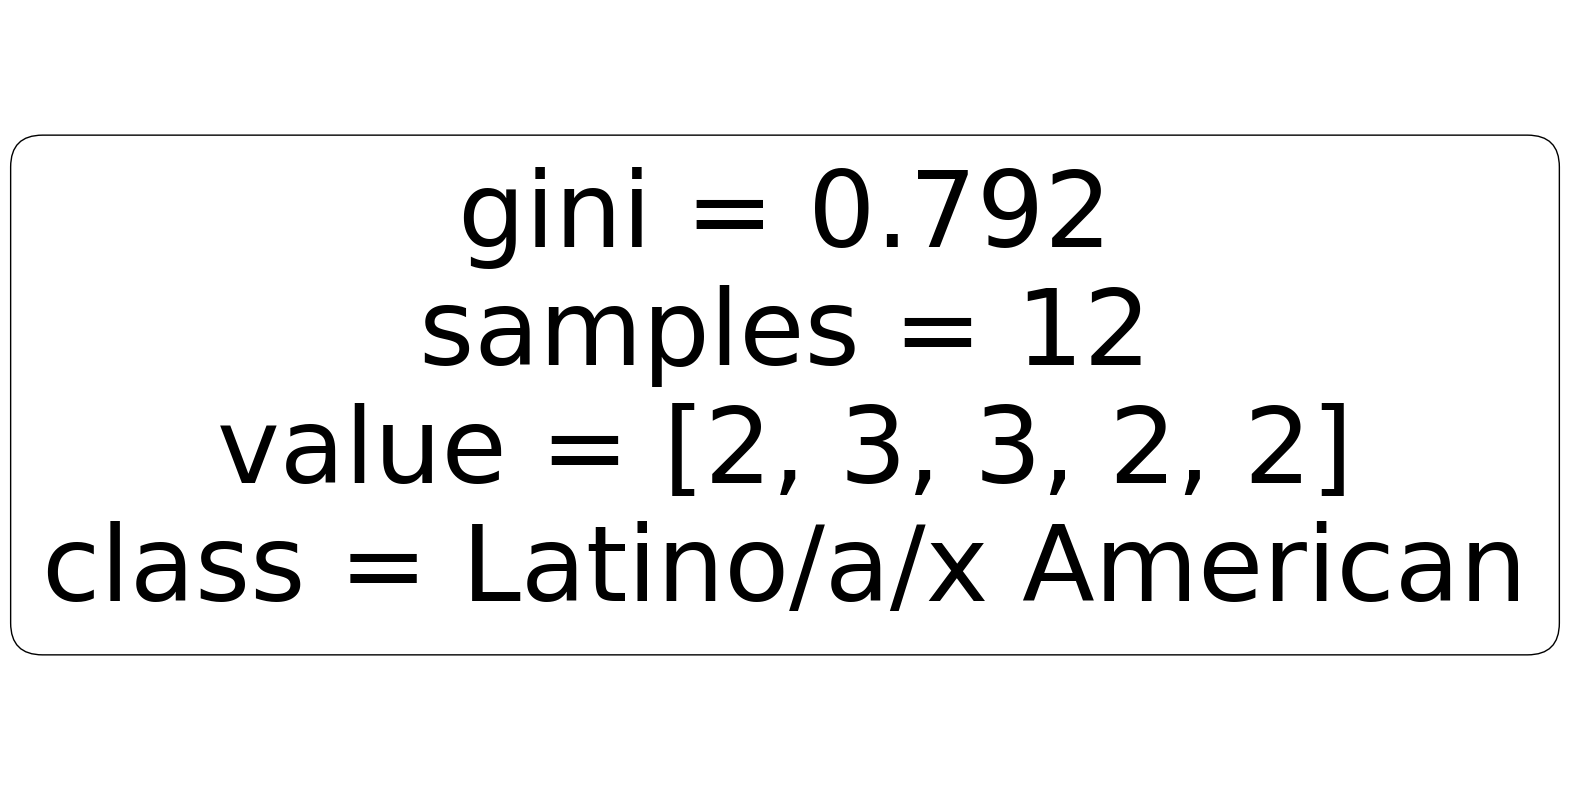

In [27]:
private_classifier.plotter(model=best_model, show_fig=True)

Now that we have the best ccp alpha let us run that model and get the classification report.

In [28]:
private_classifier.run_model(ccp_alpha=ccp_alpha, print_report=True, save_files=False, plot_files=False, get_shap=False) # Leave as is to prevent the graphs from being produced

{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0.0}, '3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, 'accuracy': 0.0, 'macro avg': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'weighted avg': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'time': 0.0018529891967773438}


Now let's repeat all of this for the nonprivatized dataset.

DecisionTreeClassifier(random_state=0)


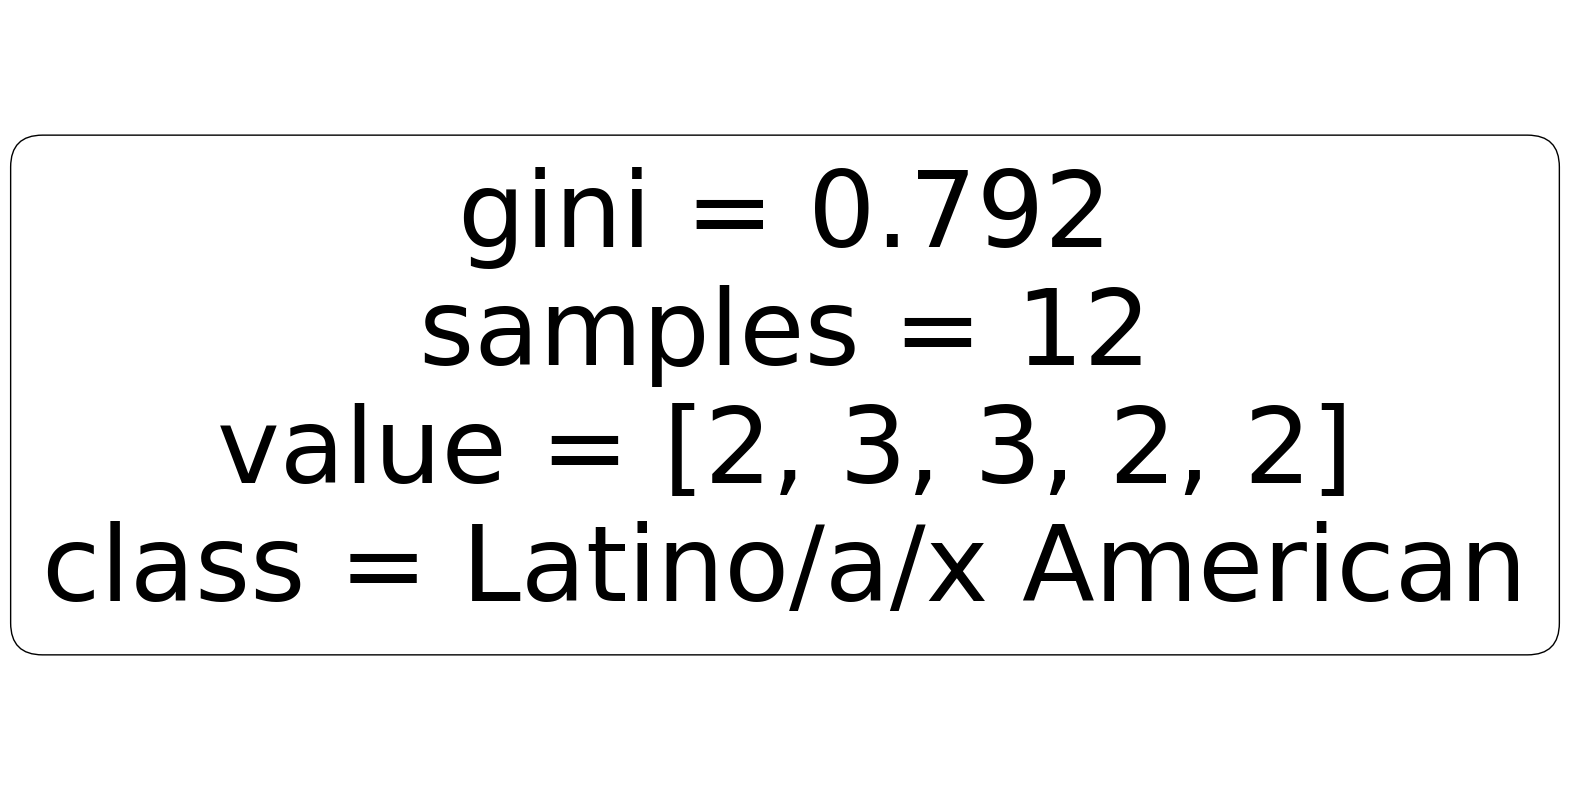

In [29]:
privatization_type = 'NoPrivatization'

nonprivate_classifier = DTClassifier(privatization_type, RNN_model, target, privatized_combined)

# Get the best ccp alpha based on X test accuracy
best_model, ccp_alpha = nonprivate_classifier.get_best_model(make_graphs=False, save_model=False) # Leave this input to prevent the graphs from being produced
print(best_model)

# Plot the best model
nonprivate_classifier.plotter(model=best_model, show_fig=True)

Now that we have the best model for the nonprivatized data, lets get the classification report for the model

In [30]:
nonprivate_classifier.run_model(ccp_alpha=ccp_alpha, print_report=True, save_files=False, plot_files=False, get_shap=False) # Leave as is to prevent the graphs from being produced

{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0.0}, '3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, '4': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0}, 'accuracy': 0.0, 'macro avg': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'weighted avg': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3.0}, 'time': 0.003621816635131836}
